In [2]:
import math
import networkx as nx
import numpy as np
import scipy
from santafe import plplot, plfit, degree_sequence, Average
import matplotlib.pyplot as plt


def create_graph(sigma, _lambda=5, _N=1000):
  for _ in range(100):
    #rv = weibull_min(-1*math.log(sigma), scale=_lambda)
    #seq = np.array(rv.rvs(size=1000))
    seq = np.random.weibull(-1*math.log(sigma), _N) * _lambda
    seq = np.round(seq).astype(int)
    seq = [_N-2 if val >= _N else val for val in seq]
    seq = [1 if val == 0 else val for val in seq]
    seq = [d + 1 if d % 2 != 0 else d for d in seq]
    g = nx.configuration_model(seq)
    g = nx.Graph(g)
    g.remove_edges_from(nx.selfloop_edges(g))
    if nx.is_connected(g):
      graph = nx.to_numpy_array(g)
      graph[graph!=0] = 1.0
      graph_nx = nx.from_numpy_array(graph)
      # graph_sparse = scipy.sparse.csr_matrix(graph)
      # n_edges = graph.sum()
      return graph_nx, seq
  raise ValueError("Could not generate a connected graph after 200 attempts.")

In [4]:
from santafe import plplot
from tqdm import tqdm
import matplotlib.pyplot as plt
EPOCH = 100

all_alpha = []
all_xmin = []
all_xmax = []
all_L = []

start = 0.0001
end = 0.8
steps = 100

for sigma in tqdm(np.linspace(start, end, steps)):
    mean_alpha=0
    mean_xmin=0
    mean_L=0
    mean_max_digit=0
    for _ in range(EPOCH):
        g, seq = create_graph(sigma)
        
        deglist = degree_sequence(g)
        xxx = deglist
        [alpha, xmin, L] = plfit(xxx)
        max_digit = max(deglist)
        
        mean_alpha+=alpha
        mean_xmin+=xmin
        mean_L+=L
        mean_max_digit+=max_digit

    mean_alpha=mean_alpha/EPOCH
    mean_xmin=mean_xmin/EPOCH
    mean_L=mean_L/EPOCH
    all_xmin.append(mean_xmin)
    
    all_alpha.append(mean_alpha)
    all_L.append(mean_L)
    mean_max_digit=mean_max_digit/EPOCH
    all_xmax.append(mean_max_digit)

 45%|██████████████████████████████████▋                                          | 45/100 [04:29<06:40,  7.29s/it]

(PLFIT) Warning: finite-size bias may be present.



 49%|█████████████████████████████████████▋                                       | 49/100 [05:00<06:36,  7.78s/it]

(PLFIT) Warning: finite-size bias may be present.



 52%|████████████████████████████████████████                                     | 52/100 [05:27<06:51,  8.57s/it]

(PLFIT) Warning: finite-size bias may be present.



 54%|█████████████████████████████████████████▌                                   | 54/100 [05:47<07:09,  9.34s/it]

(PLFIT) Warning: finite-size bias may be present.



 55%|██████████████████████████████████████████▎                                  | 55/100 [05:58<07:16,  9.69s/it]

(PLFIT) Warning: finite-size bias may be present.



 56%|███████████████████████████████████████████                                  | 56/100 [06:08<07:13,  9.86s/it]

(PLFIT) Warning: finite-size bias may be present.



 59%|█████████████████████████████████████████████▍                               | 59/100 [06:42<07:29, 10.96s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 60%|██████████████████████████████████████████████▏                              | 60/100 [06:54<07:29, 11.25s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 61%|██████████████████████████████████████████████▉                              | 61/100 [07:06<07:28, 11.51s/it]

(PLFIT) Warning: finite-size bias may be present.



 63%|████████████████████████████████████████████████▌                            | 63/100 [07:32<07:34, 12.27s/it]

(PLFIT) Warning: finite-size bias may be present.



 64%|█████████████████████████████████████████████████▎                           | 64/100 [07:47<07:49, 13.03s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 65%|██████████████████████████████████████████████████                           | 65/100 [08:02<07:55, 13.60s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 66%|██████████████████████████████████████████████████▊                          | 66/100 [08:18<08:03, 14.23s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 67%|███████████████████████████████████████████████████▌                         | 67/100 [08:34<08:09, 14.84s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 68%|████████████████████████████████████████████████████▎                        | 68/100 [08:51<08:19, 15.62s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 69%|█████████████████████████████████████████████████████▏                       | 69/100 [09:10<08:31, 16.50s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 70%|█████████████████████████████████████████████████████▉                       | 70/100 [09:30<08:44, 17.49s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 71%|██████████████████████████████████████████████████████▋                      | 71/100 [09:50<08:50, 18.31s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 72%|███████████████████████████████████████████████████████▍                     | 72/100 [10:13<09:10, 19.65s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 73%|████████████████████████████████████████████████████████▏                    | 73/100 [10:37<09:27, 21.02s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 74%|████████████████████████████████████████████████████████▉                    | 74/100 [11:03<09:45, 22.51s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 75%|█████████████████████████████████████████████████████████▊                   | 75/100 [11:32<10:10, 24.42s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 76%|██████████████████████████████████████████████████████████▌                  | 76/100 [12:02<10:25, 26.07s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 77%|███████████████████████████████████████████████████████████▎                 | 77/100 [12:35<10:48, 28.22s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 78%|████████████████████████████████████████████████████████████                 | 78/100 [13:10<11:08, 30.41s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 79%|████████████████████████████████████████████████████████████▊                | 79/100 [13:49<11:27, 32.76s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 80%|█████████████████████████████████████████████████████████████▌               | 80/100 [14:31<11:54, 35.75s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bi

 81%|██████████████████████████████████████████████████████████████▎              | 81/100 [15:13<11:53, 37.55s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 82%|███████████████████████████████████████████████████████████████▏             | 82/100 [16:01<12:11, 40.66s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 83%|███████████████████████████████████████████████████████████████▉             | 83/100 [16:54<12:34, 44.37s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 84%|████████████████████████████████████████████████████████████████▋            | 84/100 [17:51<12:48, 48.06s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bi

 85%|█████████████████████████████████████████████████████████████████▍           | 85/100 [18:50<12:52, 51.49s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 86%|██████████████████████████████████████████████████████████████████▏          | 86/100 [19:58<13:08, 56.31s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 87%|██████████████████████████████████████████████████████████████████▉          | 87/100 [21:08<13:07, 60.59s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 88%|███████████████████████████████████████████████████████████████████▊         | 88/100 [22:23<12:57, 64.80s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 89%|████████████████████████████████████████████████████████████████████▌        | 89/100 [23:35<12:18, 67.12s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 90%|█████████████████████████████████████████████████████████████████████▎       | 90/100 [24:51<11:37, 69.76s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



 91%|██████████████████████████████████████████████████████████████████████       | 91/100 [26:05<10:37, 70.81s/it]

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.

(PLFIT) Warning: finite-size bias may be present.



100%|████████████████████████████████████████████████████████████████████████████| 100/100 [39:44<00:00, 23.85s/it]


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/3148233730.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\\alpha$ of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/3148233730.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/3148233730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


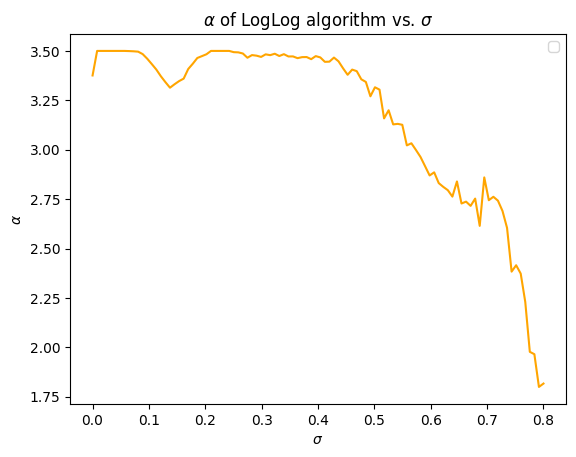

In [5]:
x = np.linspace(start, end, steps)
plt.plot(x, all_alpha, color='orange')
plt.title("$\\alpha$ of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("$\\alpha$")
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/1620707.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\\alpha$ of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/1620707.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/1620707.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


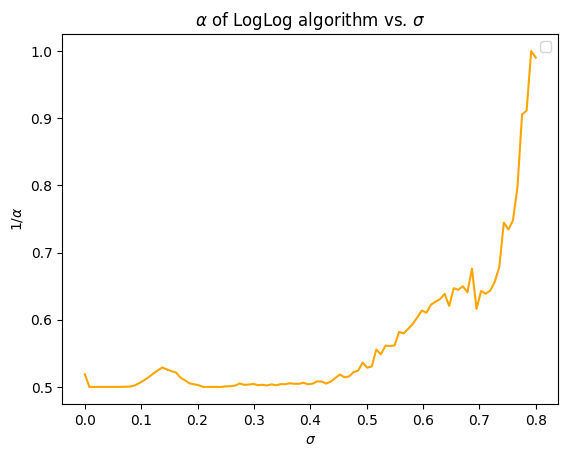

In [6]:
x = np.linspace(start, end, steps)
alpha = [1/((alpha - min(all_alpha))/(max(all_alpha) - min(all_alpha))+1) for alpha in all_alpha]
plt.plot(x, alpha, color='orange')
plt.title("$\\alpha$ of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("1/$\\alpha$")
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/3854065423.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("xmin of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/3854065423.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/3854065423.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


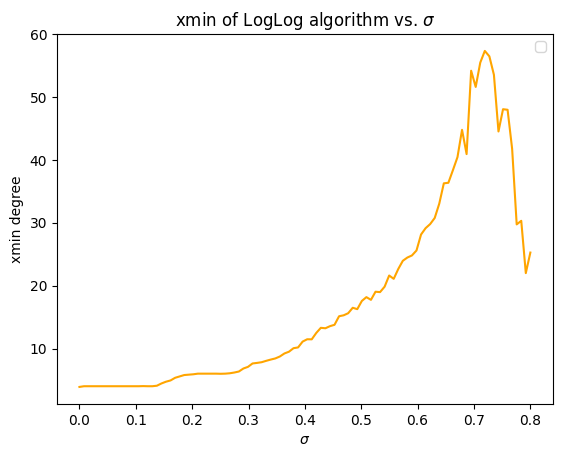

In [21]:
x = np.linspace(start, end, steps)
# xmin = [xmin/xmax for xmin, xmax in zip(all_xmin, all_xmax)]
plt.plot(x, all_xmin, color='orange')
plt.title("xmin of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("xmin degree")
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/57338279.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("xmin of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/57338279.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/57338279.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


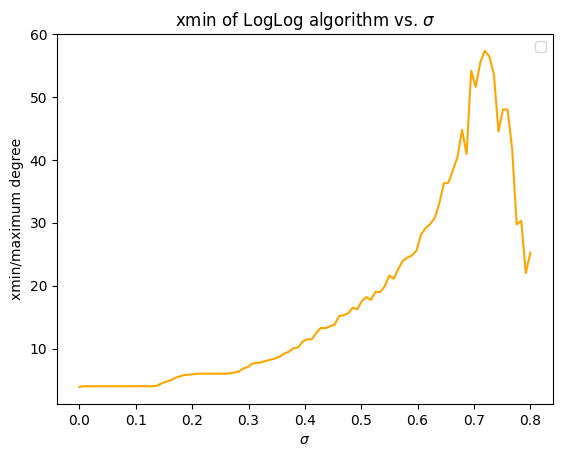

In [7]:
x = np.linspace(start, end, steps)
# xmin = [xmin/xmax for xmin, xmax in zip(all_xmin, all_xmax)]
plt.plot(x, all_xmin, color='orange')
plt.title("xmin of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("xmin/maximum degree")
plt.legend()
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/2206573423.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("xmin of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/2206573423.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/2206573423.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


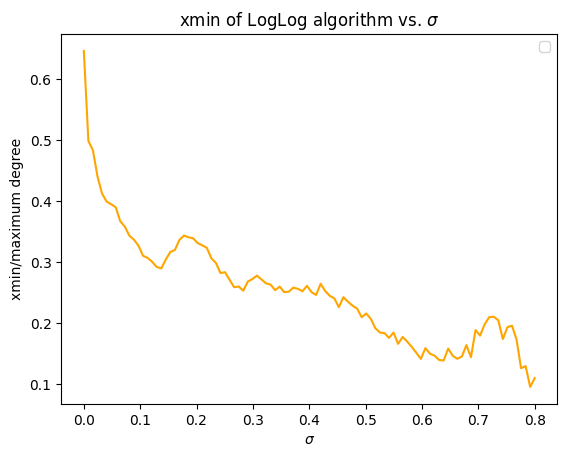

In [8]:
x = np.linspace(start, end, steps)
xmin = [xmin/xmax for xmin, xmax in zip(all_xmin, all_xmax)]
# xmin = [x/max(xmin) for x in xmin]
plt.plot(x, xmin, color='orange')
plt.title("xmin of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("xmin/maximum degree")
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/1036357204.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("xmin of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/1036357204.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/1036357204.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


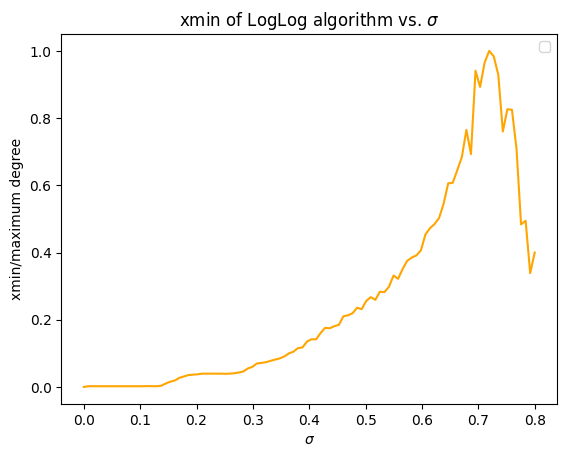

In [9]:
x = np.linspace(start, end, steps)
xmin = [(xmin - min(all_xmin))/(max(all_xmin) - min(all_xmin)) for xmin in all_xmin]
plt.plot(x, xmin, color='orange')
plt.title("xmin of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("xmin/maximum degree")
plt.legend()
plt.show()

[0.0, 0.1767381284843339, 0.19588670488513468, 0.2083065166905135, 0.2145728672599109, 0.22225149493603447, 0.22395464732716114, 0.2320459581412409, 0.22910126245064974, 0.23381392909367968, 0.2381160664724746, 0.23654749154079052, 0.23610949788036278, 0.23433544959770047, 0.24154818813902243, 0.2356949765729254, 0.2395850517213789, 0.25923425437932573, 0.34735205289495086, 0.4185692558395084, 0.46828094990679675, 0.5739880206775443, 0.6213372379476079, 0.6718487659079695, 0.6839586501476085, 0.6893859797190354, 0.7033434709450361, 0.6939803678235532, 0.6900207260824667, 0.6862362026160979, 0.6784388249997857, 0.6640183334353528, 0.6631509701176861, 0.6611922623610432, 0.6604717696593497, 0.6756436011974905, 0.7277580051602168, 0.7547383992092626, 0.811707781506609, 0.8191852324840153, 0.820901863233417, 0.8325410658900202, 0.8430690591592762, 0.8374419564807227, 0.853986157042828, 0.8763828266809017, 0.8957494060469523, 0.9168785223347379, 0.9094542583315156, 0.9506837710060339, 0.960

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/420924131.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.title("likelihood of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/420924131.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/420924131.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


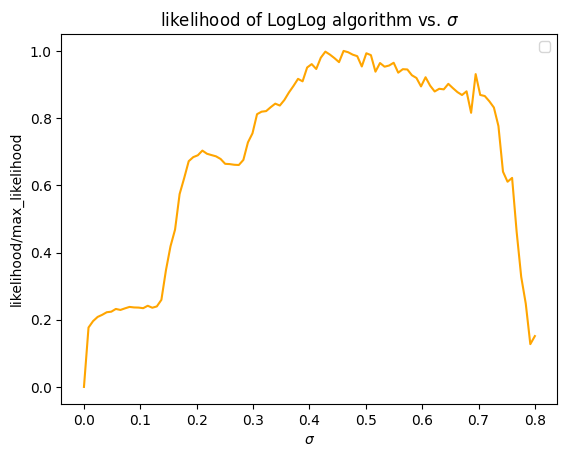

In [11]:
import math


x = np.linspace(start, end, steps)

L = [(L - min(all_L))/(max(all_L) - min(all_L)) for L in all_L]
print(L)
# L = [L/max(all_L) for L in all_L]
# L = [l/max(L) for l in L]
# L = [math.log(-1*l) for l in all_L]
# L = [l/max(L) for l in L]
# L = [l for l in L]
plt.plot(x, L, color='orange')
plt.title("likelihood of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("likelihood/max_likelihood")
plt.legend()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/3789253810.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.title("heterogeneity of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/3789253810.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/3789253810.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


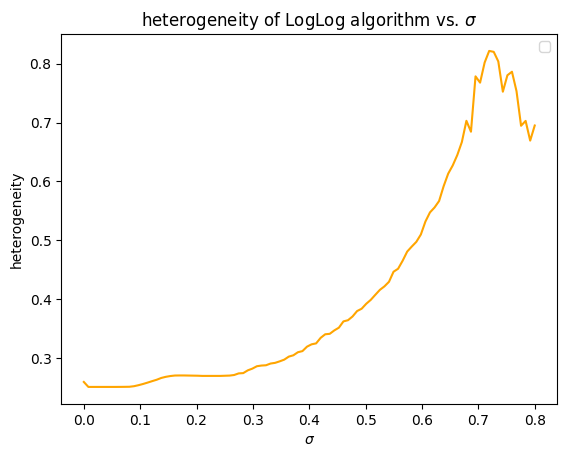

In [12]:
data = [(_alpha + _xmin)/2 for _alpha, _xmin in zip(alpha, xmin)]

x = np.linspace(start, end, steps)

plt.plot(x, data, color='orange')
plt.title("heterogeneity of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("heterogeneity")
plt.legend()
plt.show()

In [18]:
mean_alpha=0
mean_xmin=0
mean_L=0
mean_max_digit=0
EPOCH = 40

for _ in tqdm(range(EPOCH)):
    g, seq = create_graph(0.5)
    deglist = degree_sequence(g)
    xxx = deglist
    [alpha, xmin, L] = plfit(xxx)
    max_digit = max(deglist)
    
    mean_alpha+=alpha
    mean_xmin=mean_xmin+xmin
    mean_L=mean_L+L
    mean_max_digit=mean_max_digit+max_digit

mean_alpha/=EPOCH
mean_xmin/=EPOCH
mean_L/=EPOCH
mean_max_digit/=EPOCH

print(mean_alpha)
print(mean_xmin)
print(mean_L)

alpha = [1/((alpha - min(all_alpha))/(max(all_alpha) - min(all_alpha))+1) for alpha in all_alpha]
xmin = [(xmin - min(all_xmin))/(max(all_xmin) - min(all_xmin)) for xmin in all_xmin]
data = [(_alpha + _xmin)/2 for _alpha, _xmin in zip(alpha, xmin)]

_alpha = 1/ ((mean_alpha - min(all_alpha)) / (max(all_alpha) - min(all_alpha))+1)
_xmin = (mean_xmin - min(all_xmin)) / (max(all_xmin) - min(all_xmin))
print((_alpha + _xmin)/2)

 82%|████████████████████████████████████████████████████████████████▎             | 33/40 [00:04<00:00,  8.22it/s]

(PLFIT) Warning: finite-size bias may be present.



100%|██████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.58it/s]

3.3370000000000006
18.175
-364.5002131518403
0.39624182725085444


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15714/2847835602.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("heterogeneity of LogLog algorithm vs. $\sigma$")
/tmp/ipykernel_15714/2847835602.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/tmp/ipykernel_15714/2847835602.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


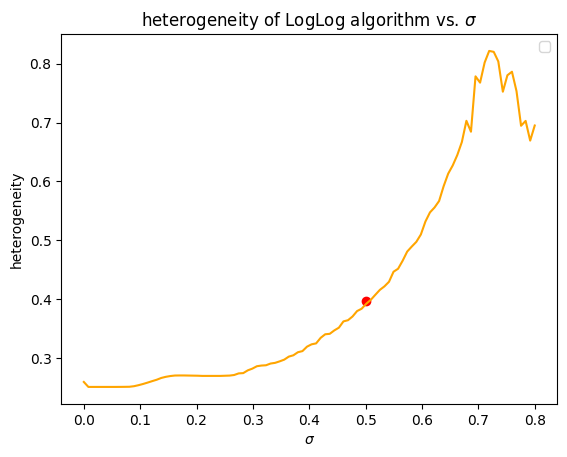

In [19]:
x = np.linspace(start, end, steps)
plt.plot(x, data, color='orange')
plt.scatter([0.5], [(_alpha + _xmin)/2], color='red')
plt.title("heterogeneity of LogLog algorithm vs. $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("heterogeneity")
plt.legend()
plt.show()